C:\Users\K.Mithushan\AppData\Local\Temp\ipykernel_11916\3833130956.py:42: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


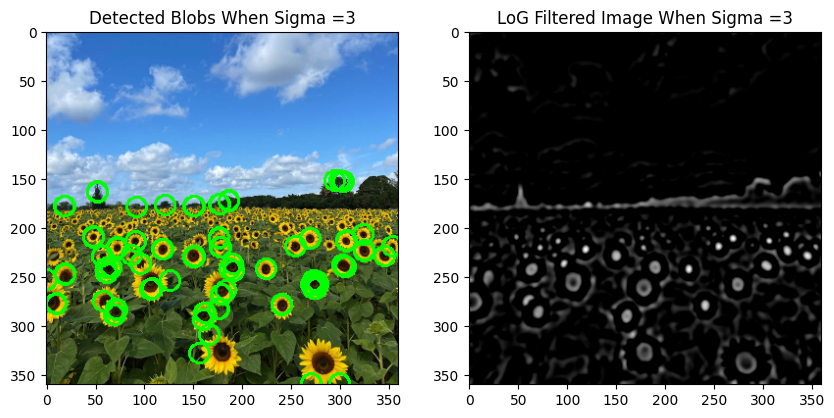

Number of detected blobs: 91


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image

im = cv2.imread('images/the_berry_farms_sunflower_field.jpg', cv2.IMREAD_REDUCED_COLOR_4)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Define the LoG filter parameters
sigma = 3
hw = 3 * sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

log_filter = 1 / (2 * np.pi * sigma**2) * (X**2 / (sigma**2) + Y**2 / (sigma**2) - 2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Apply the LoG filter to the grayscale image using convolution
filtered_image = cv2.filter2D(gray, -1, log_filter)

# Find local maxima in the filtered image
local_maxima = (filtered_image == cv2.dilate(filtered_image, np.ones((3, 3))))

# Get the coordinates of the detected local maxima
maxima_coordinates = np.argwhere(local_maxima)

# Create a list of detected blobs as (x, y) coordinates and corresponding radii
blobs = []

# Define a threshold to filter out weak blobs
threshold = 47 # You can adjust this threshold based on your image
for coord in maxima_coordinates:
    if filtered_image[coord[0], coord[1]] > threshold:
        blobs.append((coord[1], coord[0]))  # Note the order (x, y)

# Draw the detected blobs on the original image
result = im.copy()
for blob in blobs:
    cv2.circle(result, blob, 10, (0, 255, 0), 2)  # Draw circles with a radius of 10 pixels

# Display the result
plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Detected Blobs When Sigma =" + str(sigma))

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("LoG Filtered Image When Sigma =" + str(sigma))

plt.show()

# Report the number of detected blobs
print("Number of detected blobs:", len(blobs))

# Save the number of blobs to a text file with sigma value used
# donot overwrite the file
#with open('detected_blobs.txt', 'a') as f:
#    f.write('Sigma: ' + str(sigma) + '\n')
#    f.write('Number of Blobs: ' + str(len(blobs))+ '\n')


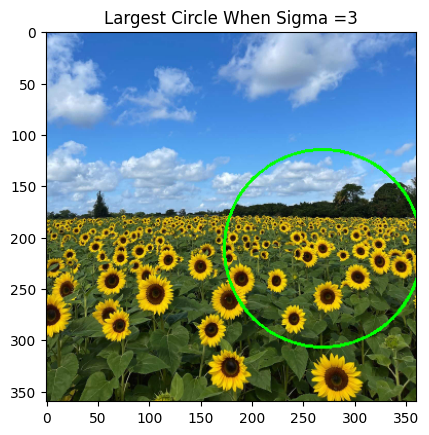

Parameters of the largest circle:
Center: (269, 211)
Radius: 96


In [2]:
# Sort the detected blobs by radius in descending order
blobs.sort(key=lambda x: filtered_image[x[1], x[0]], reverse=True)

# Extract the parameters of the largest circle
if blobs:
    largest_blob = blobs[0]
    largest_radius = filtered_image[largest_blob[1], largest_blob[0]]
    largest_circle_params = (largest_blob[0], largest_blob[1], largest_radius)

    # Draw the largest circle on the original image
    result = im.copy()
    cv2.circle(result, (largest_blob[0], largest_blob[1]), int(largest_radius), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Largest Circle When Sigma =" + str(sigma))
    plt.show()

    # Print the parameters of the largest circle
    print("Parameters of the largest circle:")
    print(f"Center: ({largest_blob[0]}, {largest_blob[1]})")
    print(f"Radius: {largest_radius}")
else:
    print("No blobs found.")

# Save the parameters of the largest circle to a text file with sigma value used
#with open('largest_circle.txt', 'a') as f:
#    f.write('Sigma value:' + str(sigma) + '\n')
#    f.write('y: '+str(largest_circle_params[0]) + '\n')
#    f.write('x: '+str(largest_circle_params[1]) + '\n')
#    f.write('Radius :' + str(largest_circle_params[2]) + '\n')

In [5]:
import cv2
import numpy as np

# Load an image (you should replace 'image.jpg' with your image file)
image = cv2.imread('images/the_berry_farms_sunflower_field.jpg', cv2.IMREAD_REDUCED_COLOR_4)

# Create a blob detector object
params = cv2.SimpleBlobDetector_Params()

# Set parameters for the blob detector (you can adjust these as needed)
params.minThreshold = 150    # Minimum threshold value
params.maxThreshold = 200   # Maximum threshold value
params.filterByArea = True  # Filter blobs by area
params.minArea = 400 #100        # Minimum blob area
params.filterByCircularity = False  # Don't filter by circularity
params.filterByConvexity = False   # Don't filter by convexity
params.filterByInertia = False     # Don't filter by inertia

# Create the blob detector with the specified parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
blobs = detector.detect(image)

# Draw detected blobs on the original image
image_with_blobs = cv2.drawKeypoints(image, blobs, np.array([]), (0, 0, 255),
                                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original image with blobs
cv2.imshow('Image with Blobs', image_with_blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

# Load the image
image_path ='images/the_berry_farms_sunflower_field.jpg'
im = cv2.imread(image_path, cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Define a range of sigma values (standard deviations for Gaussian smoothing)
sigma_min = 5
sigma_max = 50
sigma_step = 10

# Initialize variables to store information about the largest circle
largest_circle_radius = 0
largest_circle_center = (0, 0)
largest_circle_sigma = 0

# Iterate over different sigma values
for sigma in range(sigma_min, sigma_max + 1, sigma_step):
    # Apply Gaussian smoothing with the current sigma
    smoothed_im = cv2.GaussianBlur(gray_im, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Compute the Laplacian of Gaussian (LoG)
    log_im = cv2.Laplacian(smoothed_im, cv2.CV_64F)

    # Find local maxima (extrema) in the LoG image
    extrema = (cv2.dilate(log_im, np.ones((3, 3))) == log_im) & (cv2.erode(log_im, np.ones((3, 3))) == log_im)

    # Extract coordinates of extrema (potential circle centers)
    y, x = np.where(extrema)

    # Iterate through potential circle centers
    for i in range(len(x)):
        center = (x[i], y[i])
        radius = sigma  # Radius is equal to the current sigma

        # Check if the circle is the largest found so far
        if radius > largest_circle_radius:
            largest_circle_radius = radius
            largest_circle_center = center
            largest_circle_sigma = sigma   

# Draw the largest circle on the original image
cv2.circle(im, largest_circle_center, largest_circle_radius, (0, 0, 255), 2)

# Display the original image with the largest circle
cv2.imshow('Largest Circle', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Report the parameters of the largest circle
print("Largest Circle:")
print("Center:", largest_circle_center)
print("Radius:", largest_circle_radius)
print("Sigma (used for smoothing):", largest_circle_sigma)


Largest Circle:
Center: (0, 0)
Radius: 45
Sigma (used for smoothing): 45


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv2.imread('images/the_berry_farms_sunflower_field.jpg', cv2.IMREAD_REDUCED_COLOR_4)

# Convert the image to grayscale
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Create a function for LoG blob detection
def detect_blobs(image, sigma):
    # Apply Gaussian blur with the specified sigma
    blurred = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma)
    
    # Calculate the Laplacian of the blurred image
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    
    # Calculate the absolute Laplacian to detect blobs
    abs_laplacian = np.abs(laplacian)
    
    # Find local maxima in the absolute Laplacian
    _, thresh = cv2.threshold(abs_laplacian, 30, 255, cv2.THRESH_BINARY)
    blobs = cv2.findNonZero(thresh)
    
    return blobs

# Initialize variables to store parameters of the largest circle
largest_radius = 0
largest_center = (0, 0)
largest_sigma = 0

# Loop over a range of sigma values to detect blobs at different scales
for sigma in np.arange(1, 10, 0.5):
    # Perform blob detection for the current sigma
    blobs = detect_blobs(im_gray, sigma)
    
    # Calculate radii for detected circles
    if blobs is not None:
        radii = np.sqrt(np.sum((blobs - np.mean(blobs, axis=0))**2, axis=1))
        
        # Find the largest circle
        max_radius_index = np.argmax(radii)
        if radii[max_radius_index] > largest_radius:
            largest_radius = radii[max_radius_index]
            largest_center = tuple(blobs[max_radius_index][0])
            largest_sigma = sigma

# Report the parameters of the largest circle
print("Largest Circle Parameters:")
print("Center:", largest_center)
print("Radius:", largest_radius)
print("Sigma:", largest_sigma)

# Draw the largest circle on the image
im_with_circle = im.copy()
cv2.circle(im_with_circle, largest_center, int(largest_radius), (0, 255, 0), 2)

# Display the image with the detected circle using Matplotlib
plt.imshow(cv2.cvtColor(im_with_circle, cv2.COLOR_BGR2RGB))
plt.title("Sunflower Field with Largest Circle")
plt.axis('off')
plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [9]:
import cv2
import numpy as np

# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpg'
im = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Define a range of sigma values for scale-space
sigma_values = np.arange(1, 10, 0.5)

# Initialize a list to store detected circles
circles = []

# Loop through each sigma value
for sigma in sigma_values:
    # Apply Gaussian blur with the current sigma
    blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

    # Compute the Laplacian of the blurred image
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the Laplacian of Gaussian (LoG) response
    log_response = sigma**2 * abs(laplacian)

    # Find local maxima (extrema) in the LoG response
    local_maxima = (log_response == cv2.dilate(log_response, np.ones((3, 3))))

    # Get the coordinates of the detected local maxima
    maxima_coordinates = np.argwhere(local_maxima)

    # Filter the local maxima based on a threshold
    threshold = 0.02  # You can adjust this threshold based on your image
    valid_maxima = [coord for coord in maxima_coordinates if log_response[coord[0], coord[1]] > threshold]

    # Extract the radii of detected circles from the LoG response
    radii = [sigma * np.sqrt(2)] * len(valid_maxima)

    # Combine the coordinates and radii to form circle parameters
    circles.extend(zip(valid_maxima, radii))

# Draw the detected circles on the original image
result = im.copy()
for (x, y), radius in circles:
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(result, center, radius, (0, 255, 0), 2)

# Display the result
cv2.imshow('Detected Circles', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


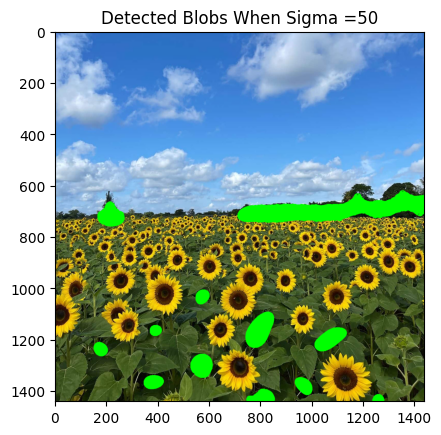

Number of detected blobs: 30322


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpg'
im = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Define the LoG filter parameters
sigma = 50
hw = 3 * sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log_filter = 1 / (2 * np.pi * sigma**2) * (X**2 / (sigma**2) + Y**2 / (sigma**2) - 2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Apply the LoG filter to the grayscale image using convolution
filtered_image = cv2.filter2D(gray, -1, log_filter)

# Find local maxima in the filtered image
local_maxima = (filtered_image == cv2.dilate(filtered_image, np.ones((3, 3))))

# Get the coordinates of the detected local maxima
maxima_coordinates = np.argwhere(local_maxima)

# Create a list of detected blobs as (x, y) coordinates and corresponding radii
blobs = []

# Define a threshold to filter out weak blobs
threshold = 20 # You can adjust this threshold based on your image
for coord in maxima_coordinates:
    if filtered_image[coord[0], coord[1]] > threshold:
        blobs.append((coord[1], coord[0]))  # Note the order (x, y)

# Draw the detected blobs on the original image
result = im.copy()
for blob in blobs:
    cv2.circle(result, blob, 10, (0, 255, 0), 2)  # Draw circles with a radius of 10 pixels

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Detected Blobs When Sigma =" + str(sigma))
plt.show()

# Report the number of detected blobs
print("Number of detected blobs:", len(blobs))

# Save the number of blobs to a text file with sigma value used
# donot overwrite the file
with open('detected_blobs.txt', 'a') as f:
    f.write('Sigma: ' + str(sigma) + '\n')
    f.write('Number of Blobs: ' + str(len(blobs)))


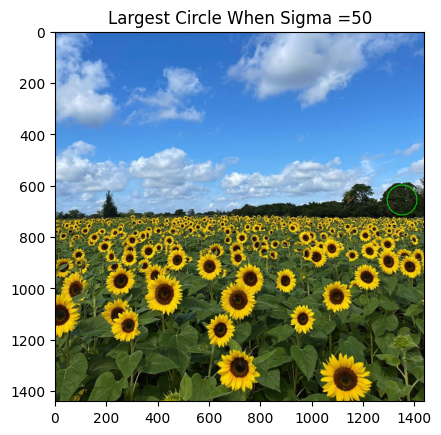

Parameters of the largest circle:
Center: (1350, 657)
Radius: 58


In [11]:
# Sort the detected blobs by radius in descending order
blobs.sort(key=lambda x: filtered_image[x[1], x[0]], reverse=True)

# Extract the parameters of the largest circle
if blobs:
    largest_blob = blobs[0]
    largest_radius = filtered_image[largest_blob[1], largest_blob[0]]
    largest_circle_params = (largest_blob[0], largest_blob[1], largest_radius)

    # Draw the largest circle on the original image
    result = im.copy()
    cv2.circle(result, (largest_blob[0], largest_blob[1]), int(largest_radius), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Largest Circle When Sigma =" + str(sigma))
    plt.show()

    # Print the parameters of the largest circle
    print("Parameters of the largest circle:")
    print(f"Center: ({largest_blob[0]}, {largest_blob[1]})")
    print(f"Radius: {largest_radius}")
else:
    print("No blobs found.")

# Save the parameters of the largest circle to a text file with sigma value used
with open('largest_circle.txt', 'a') as f:
    f.write('Sigma value:' + str(sigma) + '\n')
    f.write('y: '+str(largest_circle_params[0]) + '\n')
    f.write('x: '+str(largest_circle_params[1]) + '\n')
    f.write('Radius :' + str(largest_circle_params[2]) + '\n')

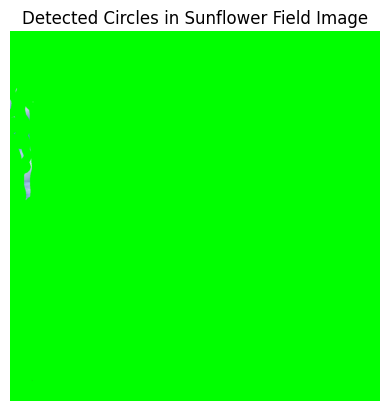

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpg'
im = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Define a range of sigma values for scale-space
sigma= 10

# Initialize a list to store detected circles
circles = []

# Apply Gaussian blur with the current sigma
blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

    # Compute the Laplacian of the blurred image
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the Laplacian of Gaussian (LoG) response
log_response = sigma**2 * abs(laplacian)

    # Find local maxima (extrema) in the LoG response
local_maxima = (log_response == cv2.dilate(log_response, np.ones((3, 3))))

    # Get the coordinates of the detected local maxima
maxima_coordinates = np.argwhere(local_maxima)

    # Filter the local maxima based on a threshold
threshold = 20  # You can adjust this threshold based on your image
valid_maxima = [coord for coord in maxima_coordinates if log_response[coord[0], coord[1]] > threshold]

    # Extract the radii of detected circles from the LoG response
radii = [sigma * np.sqrt(2)] * len(valid_maxima)

    # Combine the coordinates and radii to form circle parameters
circles.extend(zip(valid_maxima, radii))

# Draw the detected circles on the original image
result = im.copy()
for (x, y), radius in circles:
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(result, center, radius, (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles in Sunflower Field Image")
plt.axis('off')  # Turn off axis labels
plt.show()
